### Importing Dependencies

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### EDA

In [ ]:
df = pd.read_excel('/content/sample_data/glass.xlsx', sheet_name='glass')

In [ ]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [ ]:
df.shape

(214, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [ ]:
df.isnull().sum()

,0
RI,0
Na,0
Mg,0
Al,0
Si,0
K,0
Ca,0
Ba,0
Fe,0
Type,0


In [ ]:
# the datatypes of all columns are correct and there are null values detected.

In [ ]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


<Axes: >

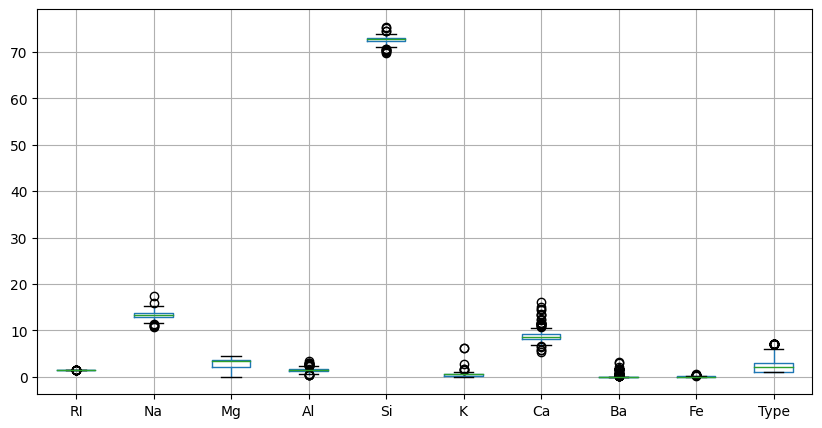

In [ ]:
plt.figure(figsize=(10,5))
df.boxplot()

In [ ]:
'''
The variables Na,Ca,Ba and Si show significant number of outliers.
'''

'\nThe variables Na,Ca,Ba and Si show significant number of outliers.\n'

Treating Outliers

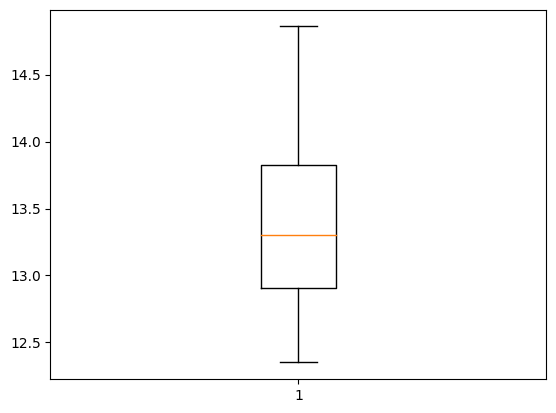

In [ ]:
from scipy.stats.mstats import winsorize
WinsorizedArrayNa = winsorize(df.Na.values,(0.05,0.05))
plt.boxplot(WinsorizedArrayNa);

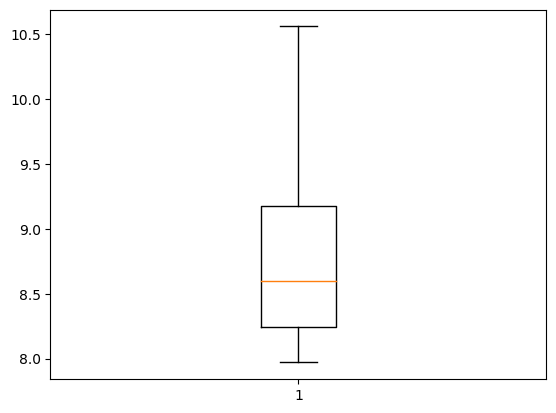

In [ ]:
WinsorizedArrayCa = winsorize(df.Ca.values,(0.1,0.1))
plt.boxplot(WinsorizedArrayCa);

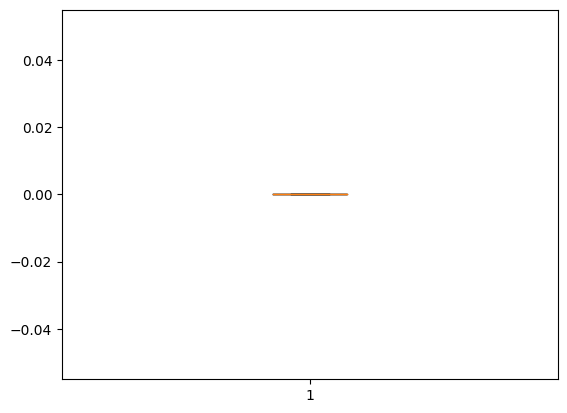

In [ ]:
WinsorizedArrayBa = winsorize(df.Ba.values,(0.2,0.2))
plt.boxplot(WinsorizedArrayBa);

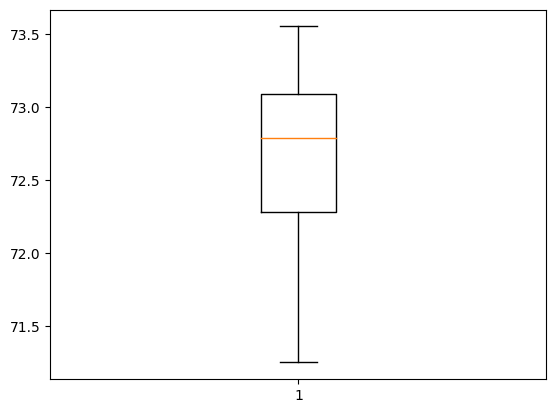

In [ ]:
WinsorizedArraySi = winsorize(df.Si.values,(0.05,0.05))
plt.boxplot(WinsorizedArraySi);

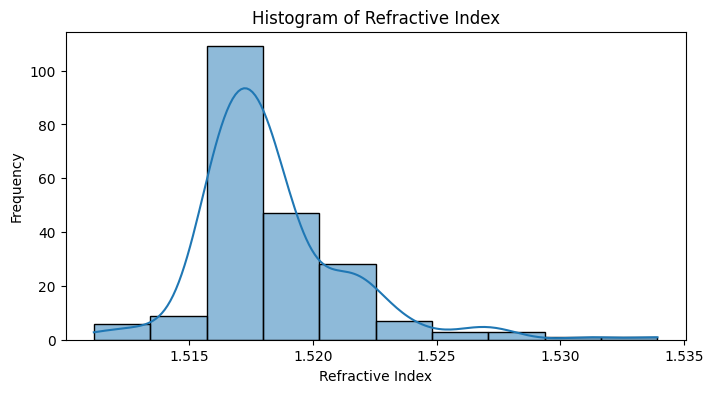

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(df.RI,bins = 10,kde=True)
plt.title('Histogram of Refractive Index')
plt.xlabel('Refractive Index')
plt.ylabel('Frequency')
plt.show()

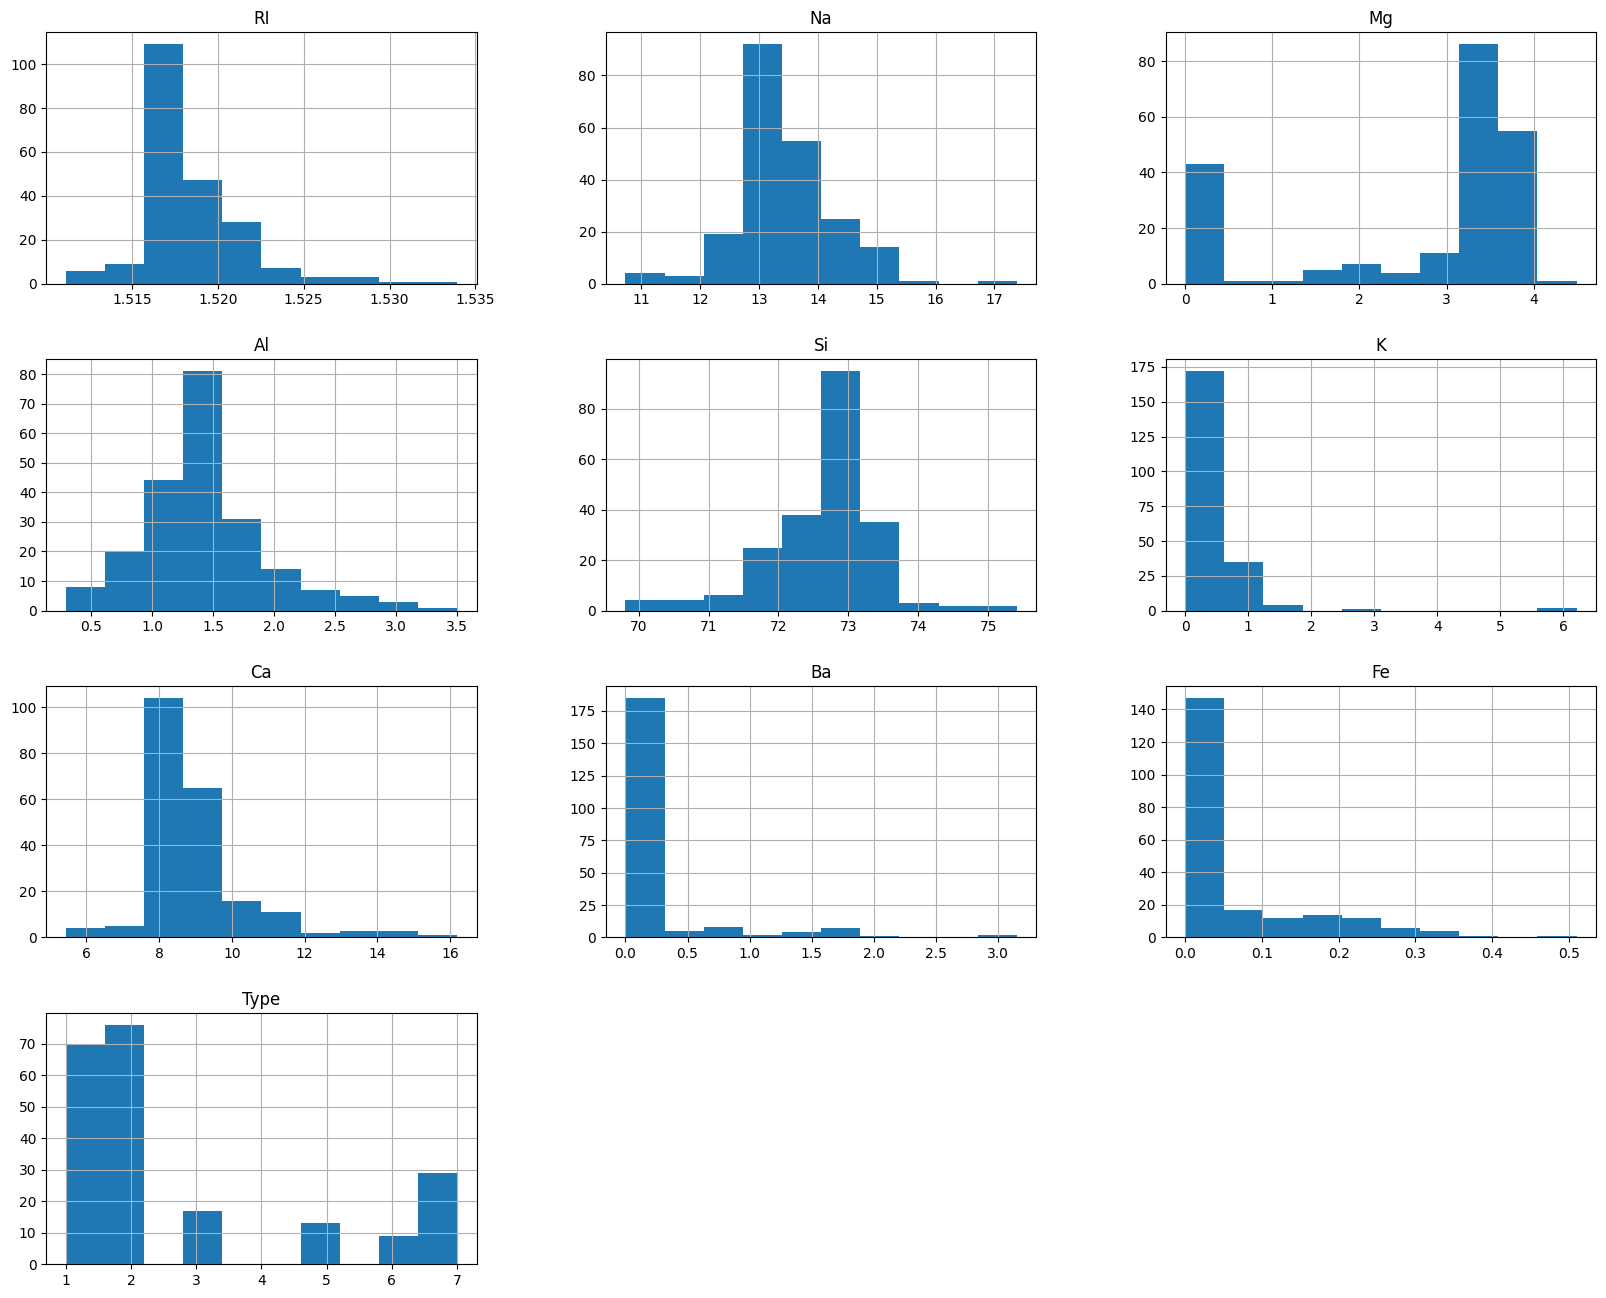

In [ ]:
df.hist(figsize=(20,16))
plt.show()

Variables RI,Na,Si,Al and Ca are almost normally distributed.

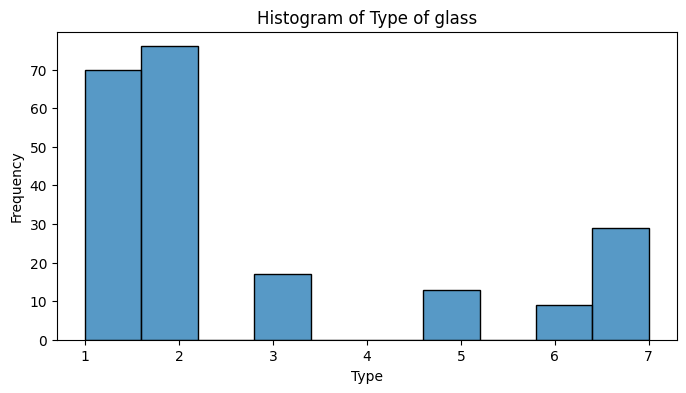

In [ ]:
#Histogram for categorical variable
plt.figure(figsize=(8,4))
sns.histplot(df.Type,bins = 10)
plt.title('Histogram of Type of glass')
plt.xlabel('Type')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardization
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.iloc[:, :-1])


# Converting the scaled data back to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=df.columns[:-1])
scaled_df['Type'] = df['Type']


In [ ]:
# Handling Imbalanced Data
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(scaled_df.iloc[:, :-1], scaled_df['Type'])

# Combining resampled data back into a DataFrame
resampled_df = pd.DataFrame(X_resampled, columns=df.columns[:-1])
resampled_df['Type'] = y_resampled


## 4: Random Forest Model Implementation

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predicting on test data
y_pred = rf_model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)
print("Confusion Matrix:")
print(matrix)


Accuracy: 0.8540145985401459
Classification Report:
              precision    recall  f1-score   support

           1       0.81      0.57      0.67        30
           2       0.76      0.76      0.76        25
           3       0.61      1.00      0.76        14
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        23
           7       0.96      0.96      0.96        28

    accuracy                           0.85       137
   macro avg       0.86      0.88      0.86       137
weighted avg       0.87      0.85      0.85       137

Confusion Matrix:
[[17  5  8  0  0  0]
 [ 4 19  1  0  0  1]
 [ 0  0 14  0  0  0]
 [ 0  0  0 17  0  0]
 [ 0  0  0  0 23  0]
 [ 0  1  0  0  0 27]]


In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
rf_model = RandomForestClassifier(random_state=42)

# Features and target variable
X = resampled_df.iloc[:, :-1]
y = resampled_df['Type']


In [ ]:
# Performing 5-fold cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')

# Printing the cross-validation scores and their mean
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())


Cross-validation scores: [0.88043478 0.86813187 0.84615385 0.87912088 0.92307692]
Mean cross-validation score: 0.8793836598184426


### Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier

bagging_model = BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=10, random_state=42)
bagging_model.fit(X_train, y_train)
y_pred_bagging = bagging_model.predict(X_test)

# Evaluate Bagging Model
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
accuracy_bagging

0.8759124087591241

### Boosting

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

boosting_model = AdaBoostClassifier(base_estimator=RandomForestClassifier(), n_estimators=50, random_state=42)
boosting_model.fit(X_train, y_train)
y_pred_boosting = boosting_model.predict(X_test)

# Evaluating Boosting Model
accuracy_boosting = accuracy_score(y_test, y_pred_boosting)
print(f'Accuracy Boosting : {accuracy_boosting}')

Accuracy Boosting : 0.8759124087591241


### Comparing the results

In [ ]:
print(f'Random Forest Accuracy : {accuracy}')
print(f'Random Forest Mean cv score : {cv_scores.mean()}')
print(f'Bagging Accuracy: {accuracy_bagging}')
print(f'Boosting Accuracy: {accuracy_boosting}')

Random Forest Accuracy : 0.8540145985401459
Random Forest Mean cv score : 0.8793836598184426
Bagging Accuracy: 0.8759124087591241
Boosting Accuracy: 0.8759124087591241
